In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# 기본 데이터 확인

In [2]:
df_2024 = pd.read_csv("./data/tmdb_2024.csv")
df_2024.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Utopia,2024-12-09,movie,93.0,NaN,NaN,"Mystery, Thriller, Action, Science Fiction",James Bamford,"Moe Dunford, Charlotte Vega, Michael D. Xavier...",US,en,SP Media Group,A soldier searching for his missing wife break...,missing wife,5.136,33
1,Hunt the Wicked,2024-02-12,movie,103.0,NaN,NaN,Action,Chris Huo,"Xie Miao, Andy On, Andrew Lin Hoi, Hong Shuang...",CN,zh,"Tencent Video, iQIYI",The film tells the story of narcotics police o...,缉毒,4.800,6
2,The Roundup: Punishment,2024-04-24,movie,109.0,NaN,NaN,"Action, Crime, Drama, Thriller, Comedy",Heo Myeong-haeng,"Don Lee, Kim Moo-yul, Park Ji-hwan, Lee Dong-h...",KR,ko,"BA Entertainment, Hong Film, Big Punch Picture...",'Monster Cop' Ma Seok-do investigates an illeg...,"casino, police, detective, sequel, illegal gam...",6.831,139
3,Life After Fighting,2024-06-07,movie,126.0,NaN,NaN,"Action, Drama, Thriller",Bren Foster,"Bren Foster, Cassie Howarth, Luke Ford, Annabe...",AU,en,"Blue Stone Media, Broken Yellow, Spinning Plates",Retired martial arts world champion Alex Faulk...,"angry, anxious",6.944,36
4,Moana 2,2024-11-21,movie,100.0,NaN,NaN,"Animation, Adventure, Family, Comedy","David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Auliʻi Cravalho, Dwayne Johnson, Hualālai Chun...",US,en,"Walt Disney Pictures, Walt Disney Animation St...",After receiving an unexpected call from her wa...,"sea, ocean, villain, musical, sequel, duringcr...",7.072,2472


In [4]:
df_2024.sort_values(by='title', ascending=True).head(10)

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
4235,"""Auf der Alm da gibt's koa Sünd"" - Die Erotikf...",2024-08-02,movie,48.0,NaN,NaN,"Documentary, TV Movie",Otto Retzer,"Rinaldo Talamonti, Christine Schuberth, Isa Ha...",AT,de,"Lisa Film, ORF, Melodie TV","In the 1960s, the film production company Lisa...","german cinema, erotica",0.000,0
17473,"""FLOW THE CARNIVAL 2023 ~NARUTO SHIBARI~"" SPECIAL",2024-02-07,tv,60.0,1.0,1.0,NaN,NaN,NaN,JP,ja,Space Shower TV,"Broadcasting the tour for the album ""FLOW THE ...",NaN,0.000,0
4806,"""I Will Revenge This World With Love"" - S. Par...",2024-08-28,movie,110.0,NaN,NaN,Documentary,Zara Jian,"Emir Kusturica, Joël Chapron, Artavazd Peleshi...","AM, FR, GB",hy,"Boomerang Media .am, Ava films, La Huit, David...",The author of the film decides to leave the co...,"interview, archive footage, old footage, portr...",0.000,1
3378,"""Les dents de la mer"", l'histoire d'un succès ...",2024-12-16,movie,NaN,NaN,NaN,"Documentary, TV Movie","Antoine Coursat, Olivier Bonnard","Steven Spielberg, Lorraine Gary, Joe Alves, Ca...",FR,fr,"CAPA, ARTE, RTBF","In the summer of 1975, the young director Stev...","cinema on cinema, movie business, social docum...",6.700,3
9120,#17 - To Finish The Barkley Marathons,2024-02-17,movie,63.0,NaN,NaN,Documentary,"Fabien Duflos, Alice Duval-Barré","Karel Sabbe, Lazarus Lake, Joe McConaughy, Joh...",BE,en,Tangram Films,An unprecedented look into the psyche of Karel...,"belgium, endurance, barkley marathons, ultra r...",5.000,1
12315,#90’s - A Middle Class Biopic,2024-01-05,tv,NaN,1.0,6.0,"Family, Comedy, Drama",Aditya Hasan,"Sivaji Sontineni, Vasuki Anand, Mouli, Vasanth...",IN,te,NaN,"A nostalgic trip down memory lane, delving int...",NaN,8.200,4
1102,#AMFAD: All My Friends Are Dead,2024-08-29,movie,91.0,NaN,NaN,"Horror, Comedy, Thriller",Marcus Dunstan,"Jade Pettyjohn, JoJo Siwa, Jennifer Ens, Ali F...",US,en,"Roundtable Entertainment, Digital Riot Media, ...",A group of college friends rent an Airbnb for ...,"serial killer, college student, college friend...",5.647,34
9855,#BFFS,2024-02-01,movie,57.0,NaN,NaN,NaN,"Mya Speller Cullins, Terry T. Miles","Xica Brewer, Terry T. Miles, Marley Peek, Summ...",US,en,TerMya Productions,"What's done in the dark, is always brought to ...",NaN,0.000,0
763,#Blue_Whale,2024-01-11,movie,95.0,NaN,NaN,"Horror, Thriller",Anna Zaytseva,"Anna Potebnya, Timofey Eletskiy, Ekaterina Stu...",RU,ru,"Bazelevs Production, KION",Rebellious schoolgirl Dana grieves for her you...,"found footage, internet legend, screenlife",6.300,85
17004,#Caso,2024-09-18,tv,NaN,1.0,7.0,Documentary,NaN,"Carlos Quílez, Beatriz Osa, Cruz Morcillo",ES,es,"La Sexta, Atresmedia",NaN,NaN,10.000,1


In [5]:
df_2024.isnull().sum()

title                     0
release_date              0
type                      0
runtime                8694
season_count           9998
episode_count          9998
genre                  3732
director               7708
cast                   4436
country                  35
language                  0
production_company     7647
synopsis               5211
tags                  15562
imdb_rating               0
imdb_review_count         0
dtype: int64

# 2. 전처리 전처리_type

In [6]:
df_2024[df_2024['season_count'].isna() & df_2024['episode_count'].isna()].head(5)

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Utopia,2024-12-09,movie,93.0,NaN,NaN,"Mystery, Thriller, Action, Science Fiction",James Bamford,"Moe Dunford, Charlotte Vega, Michael D. Xavier...",US,en,SP Media Group,A soldier searching for his missing wife break...,missing wife,5.136,33
1,Hunt the Wicked,2024-02-12,movie,103.0,NaN,NaN,Action,Chris Huo,"Xie Miao, Andy On, Andrew Lin Hoi, Hong Shuang...",CN,zh,"Tencent Video, iQIYI",The film tells the story of narcotics police o...,缉毒,4.800,6
2,The Roundup: Punishment,2024-04-24,movie,109.0,NaN,NaN,"Action, Crime, Drama, Thriller, Comedy",Heo Myeong-haeng,"Don Lee, Kim Moo-yul, Park Ji-hwan, Lee Dong-h...",KR,ko,"BA Entertainment, Hong Film, Big Punch Picture...",'Monster Cop' Ma Seok-do investigates an illeg...,"casino, police, detective, sequel, illegal gam...",6.831,139
3,Life After Fighting,2024-06-07,movie,126.0,NaN,NaN,"Action, Drama, Thriller",Bren Foster,"Bren Foster, Cassie Howarth, Luke Ford, Annabe...",AU,en,"Blue Stone Media, Broken Yellow, Spinning Plates",Retired martial arts world champion Alex Faulk...,"angry, anxious",6.944,36
4,Moana 2,2024-11-21,movie,100.0,NaN,NaN,"Animation, Adventure, Family, Comedy","David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Auliʻi Cravalho, Dwayne Johnson, Hualālai Chun...",US,en,"Walt Disney Pictures, Walt Disney Animation St...",After receiving an unexpected call from her wa...,"sea, ocean, villain, musical, sequel, duringcr...",7.072,2472


In [7]:
df_2024[df_2024['season_count'].isna() & df_2024['episode_count'].isna()].shape

(9998, 16)

In [8]:
df_2024['type'].value_counts(dropna=False)

type
movie    9998
tv       9998
Name: count, dtype: int64

In [9]:
print(df_2024[df_2024['type'] == 'movie']['season_count'].value_counts(dropna=False))
print(df_2024[df_2024['type'] == 'movie']['episode_count'].value_counts(dropna=False))

season_count
NaN    9998
Name: count, dtype: int64
episode_count
NaN    9998
Name: count, dtype: int64


In [10]:
print(df_2024[df_2024['type'] == 'tv']['season_count'].value_counts(dropna=False))

season_count
1.0     9232
2.0      674
3.0       53
4.0       13
5.0        9
6.0        5
7.0        3
10.0       2
9.0        2
11.0       1
24.0       1
15.0       1
13.0       1
21.0       1
Name: count, dtype: int64


In [11]:
print(df_2024[df_2024['type'] == 'tv']['episode_count'].value_counts(dropna=False))

episode_count
1.0      2295
6.0       951
8.0       812
4.0       648
10.0      589
         ... 
200.0       1
267.0       1
215.0       1
149.0       1
73.0        1
Name: count, Length: 166, dtype: int64


In [12]:
df_2024_1 = df_2024

In [13]:
# movie인 경우 season/episode count가 NaN이면 1로 채움
df_2024_1.loc[df_2024_1['type'] == 'movie', ['season_count', 'episode_count']] = df_2024_1.loc[df_2024_1['type'] == 'movie', ['season_count', 'episode_count']].fillna(1)
pd.set_option('display.max_columns', None)
df_2024_1.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Utopia,2024-12-09,movie,93.0,1.0,1.0,"Mystery, Thriller, Action, Science Fiction",James Bamford,"Moe Dunford, Charlotte Vega, Michael D. Xavier...",US,en,SP Media Group,A soldier searching for his missing wife break...,missing wife,5.136,33
1,Hunt the Wicked,2024-02-12,movie,103.0,1.0,1.0,Action,Chris Huo,"Xie Miao, Andy On, Andrew Lin Hoi, Hong Shuang...",CN,zh,"Tencent Video, iQIYI",The film tells the story of narcotics police o...,缉毒,4.800,6
2,The Roundup: Punishment,2024-04-24,movie,109.0,1.0,1.0,"Action, Crime, Drama, Thriller, Comedy",Heo Myeong-haeng,"Don Lee, Kim Moo-yul, Park Ji-hwan, Lee Dong-h...",KR,ko,"BA Entertainment, Hong Film, Big Punch Picture...",'Monster Cop' Ma Seok-do investigates an illeg...,"casino, police, detective, sequel, illegal gam...",6.831,139
3,Life After Fighting,2024-06-07,movie,126.0,1.0,1.0,"Action, Drama, Thriller",Bren Foster,"Bren Foster, Cassie Howarth, Luke Ford, Annabe...",AU,en,"Blue Stone Media, Broken Yellow, Spinning Plates",Retired martial arts world champion Alex Faulk...,"angry, anxious",6.944,36
4,Moana 2,2024-11-21,movie,100.0,1.0,1.0,"Animation, Adventure, Family, Comedy","David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Auliʻi Cravalho, Dwayne Johnson, Hualālai Chun...",US,en,"Walt Disney Pictures, Walt Disney Animation St...",After receiving an unexpected call from her wa...,"sea, ocean, villain, musical, sequel, duringcr...",7.072,2472


In [14]:
df_2024[(df_2024['type'] == 'tv') & (df_2024['season_count'].isna() | df_2024['episode_count'].isna())]
#df_2020[(df_2020['type'] == 'movie') & (df_2020['season_count'].isna() | df_2020['episode_count'].isna())]

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count


In [16]:
print(df_2024_1[df_2024_1['season_count'] == 1.0]['episode_count'].value_counts(dropna=False))

episode_count
1.0      12272
6.0        922
8.0        766
4.0        635
10.0       552
         ...  
93.0         1
57.0         1
126.0        1
105.0        1
98.0         1
Name: count, Length: 141, dtype: int64


In [17]:
print(df_2024_1[df_2024_1['episode_count'] == 1.0]['season_count'].value_counts(dropna=False))

season_count
1.0     12272
2.0        12
3.0         2
15.0        1
13.0        1
21.0        1
6.0         1
5.0         1
10.0        1
4.0         1
Name: count, dtype: int64


In [18]:
df_2024_2 = df_2024_1
df_2024_2.loc[df_2024_2['type'] == 'tv', ['season_count', 'episode_count']] = df_2024_2.loc[df_2024_1['type'] == 'tv', ['season_count', 'episode_count']].fillna(1)
pd.set_option('display.max_columns', None)
df_2024_2.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Utopia,2024-12-09,movie,93.0,1.0,1.0,"Mystery, Thriller, Action, Science Fiction",James Bamford,"Moe Dunford, Charlotte Vega, Michael D. Xavier...",US,en,SP Media Group,A soldier searching for his missing wife break...,missing wife,5.136,33
1,Hunt the Wicked,2024-02-12,movie,103.0,1.0,1.0,Action,Chris Huo,"Xie Miao, Andy On, Andrew Lin Hoi, Hong Shuang...",CN,zh,"Tencent Video, iQIYI",The film tells the story of narcotics police o...,缉毒,4.800,6
2,The Roundup: Punishment,2024-04-24,movie,109.0,1.0,1.0,"Action, Crime, Drama, Thriller, Comedy",Heo Myeong-haeng,"Don Lee, Kim Moo-yul, Park Ji-hwan, Lee Dong-h...",KR,ko,"BA Entertainment, Hong Film, Big Punch Picture...",'Monster Cop' Ma Seok-do investigates an illeg...,"casino, police, detective, sequel, illegal gam...",6.831,139
3,Life After Fighting,2024-06-07,movie,126.0,1.0,1.0,"Action, Drama, Thriller",Bren Foster,"Bren Foster, Cassie Howarth, Luke Ford, Annabe...",AU,en,"Blue Stone Media, Broken Yellow, Spinning Plates",Retired martial arts world champion Alex Faulk...,"angry, anxious",6.944,36
4,Moana 2,2024-11-21,movie,100.0,1.0,1.0,"Animation, Adventure, Family, Comedy","David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Auliʻi Cravalho, Dwayne Johnson, Hualālai Chun...",US,en,"Walt Disney Pictures, Walt Disney Animation St...",After receiving an unexpected call from her wa...,"sea, ocean, villain, musical, sequel, duringcr...",7.072,2472


# 2. 데이터 전처리_runtime

In [19]:
df_2024_2.isnull().sum()

title                     0
release_date              0
type                      0
runtime                8694
season_count              0
episode_count             0
genre                  3732
director               7708
cast                   4436
country                  35
language                  0
production_company     7647
synopsis               5211
tags                  15562
imdb_rating               0
imdb_review_count         0
dtype: int64

In [20]:
df_2024_2.shape

(19996, 16)

In [23]:
df_2024_2[df_2024_2['runtime'].isna() & df_2024_2['genre'].isna() ].shape

(3036, 16)

## 2_2 runtime null 값 열 제거

In [24]:
df_2024_3 = df_2024_2

In [25]:
df_2024_3.dropna(subset=['runtime'], inplace=True)

In [26]:
df_2024_3.shape

(11302, 16)

# 2. 데이터 전처리_pr

In [27]:
df_2024_4 = df_2024_3
df_2024_4

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Utopia,2024-12-09,movie,93.0,1.0,1.0,"Mystery, Thriller, Action, Science Fiction",James Bamford,"Moe Dunford, Charlotte Vega, Michael D. Xavier...",US,en,SP Media Group,A soldier searching for his missing wife break...,missing wife,5.136,33
1,Hunt the Wicked,2024-02-12,movie,103.0,1.0,1.0,Action,Chris Huo,"Xie Miao, Andy On, Andrew Lin Hoi, Hong Shuang...",CN,zh,"Tencent Video, iQIYI",The film tells the story of narcotics police o...,缉毒,4.800,6
2,The Roundup: Punishment,2024-04-24,movie,109.0,1.0,1.0,"Action, Crime, Drama, Thriller, Comedy",Heo Myeong-haeng,"Don Lee, Kim Moo-yul, Park Ji-hwan, Lee Dong-h...",KR,ko,"BA Entertainment, Hong Film, Big Punch Picture...",'Monster Cop' Ma Seok-do investigates an illeg...,"casino, police, detective, sequel, illegal gam...",6.831,139
3,Life After Fighting,2024-06-07,movie,126.0,1.0,1.0,"Action, Drama, Thriller",Bren Foster,"Bren Foster, Cassie Howarth, Luke Ford, Annabe...",AU,en,"Blue Stone Media, Broken Yellow, Spinning Plates",Retired martial arts world champion Alex Faulk...,"angry, anxious",6.944,36
4,Moana 2,2024-11-21,movie,100.0,1.0,1.0,"Animation, Adventure, Family, Comedy","David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Auliʻi Cravalho, Dwayne Johnson, Hualālai Chun...",US,en,"Walt Disney Pictures, Walt Disney Animation St...",After receiving an unexpected call from her wa...,"sea, ocean, villain, musical, sequel, duringcr...",7.072,2472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19863,Safe i Safe house,2024-09-06,tv,20.0,1.0,1.0,Documentary,NaN,NaN,DK,da,TV 2,NaN,NaN,10.000,1
19873,国宝迷踪第一季,2024-08-12,tv,40.0,1.0,4.0,"Documentary, Crime",NaN,NaN,CN,zh,bilibili,NaN,NaN,0.000,0
19893,"MAZZEL“TEA TIMES” ~1st Album ""Parade"" Release ...",2024-03-25,tv,30.0,1.0,1.0,NaN,NaN,NaN,JP,ja,Space Shower TV,The 5th installment of the 7-month series is a...,NaN,0.000,0
19955,Kaninn,2024-11-25,tv,40.0,1.0,2.0,Documentary,NaN,NaN,IS,is,NaN,"Icelandic basketball has, since the 1970s, bee...",NaN,0.000,0


In [28]:
df_2024_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11302 entries, 0 to 19984
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11302 non-null  object 
 1   release_date        11302 non-null  object 
 2   type                11302 non-null  object 
 3   runtime             11302 non-null  float64
 4   season_count        11302 non-null  float64
 5   episode_count       11302 non-null  float64
 6   genre               10606 non-null  object 
 7   director            9580 non-null   object 
 8   cast                10299 non-null  object 
 9   country             11291 non-null  object 
 10  language            11302 non-null  object 
 11  production_company  8523 non-null   object 
 12  synopsis            10478 non-null  object 
 13  tags                4080 non-null   object 
 14  imdb_rating         11302 non-null  float64
 15  imdb_review_count   11302 non-null  int64  
dtypes: float6

### tags 관련 기본 문제 해결

1) synopsis, tags, genre가 모두 NaN인 데이터 모두 제거

In [29]:
# 1. 세기: synopsis, genre가 모두 NaN인 행 개수
nan_rows = df_2024_4[['synopsis', 'genre']].isna().all(axis=1)
count_nan_rows = nan_rows.sum()
print(f"synopsis, genre가 모두 NaN인 행 개수: {count_nan_rows}")

synopsis, genre가 모두 NaN인 행 개수: 115


In [30]:
# 2. 삭제: 그런 행 삭제
df_2024_4_cleaned = df_2024_4.loc[~nan_rows].copy()

In [30]:
df_2024_4 = df_2024_4.loc[~nan_rows].copy()
df_2024_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11187 entries, 0 to 19984
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11187 non-null  object 
 1   release_date        11187 non-null  object 
 2   type                11187 non-null  object 
 3   runtime             11187 non-null  float64
 4   season_count        11187 non-null  float64
 5   episode_count       11187 non-null  float64
 6   genre               10606 non-null  object 
 7   director            9548 non-null   object 
 8   cast                10228 non-null  object 
 9   country             11176 non-null  object 
 10  language            11187 non-null  object 
 11  production_company  8488 non-null   object 
 12  synopsis            10478 non-null  object 
 13  tags                4080 non-null   object 
 14  imdb_rating         11187 non-null  float64
 15  imdb_review_count   11187 non-null  int64  
dtypes: float6

In [32]:
df_2024_4

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Utopia,2024-12-09,movie,93.0,1.0,1.0,"Mystery, Thriller, Action, Science Fiction",James Bamford,"Moe Dunford, Charlotte Vega, Michael D. Xavier...",US,en,SP Media Group,A soldier searching for his missing wife break...,missing wife,5.136,33
1,Hunt the Wicked,2024-02-12,movie,103.0,1.0,1.0,Action,Chris Huo,"Xie Miao, Andy On, Andrew Lin Hoi, Hong Shuang...",CN,zh,"Tencent Video, iQIYI",The film tells the story of narcotics police o...,缉毒,4.800,6
2,The Roundup: Punishment,2024-04-24,movie,109.0,1.0,1.0,"Action, Crime, Drama, Thriller, Comedy",Heo Myeong-haeng,"Don Lee, Kim Moo-yul, Park Ji-hwan, Lee Dong-h...",KR,ko,"BA Entertainment, Hong Film, Big Punch Picture...",'Monster Cop' Ma Seok-do investigates an illeg...,"casino, police, detective, sequel, illegal gam...",6.831,139
3,Life After Fighting,2024-06-07,movie,126.0,1.0,1.0,"Action, Drama, Thriller",Bren Foster,"Bren Foster, Cassie Howarth, Luke Ford, Annabe...",AU,en,"Blue Stone Media, Broken Yellow, Spinning Plates",Retired martial arts world champion Alex Faulk...,"angry, anxious",6.944,36
4,Moana 2,2024-11-21,movie,100.0,1.0,1.0,"Animation, Adventure, Family, Comedy","David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Auliʻi Cravalho, Dwayne Johnson, Hualālai Chun...",US,en,"Walt Disney Pictures, Walt Disney Animation St...",After receiving an unexpected call from her wa...,"sea, ocean, villain, musical, sequel, duringcr...",7.072,2472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19863,Safe i Safe house,2024-09-06,tv,20.0,1.0,1.0,Documentary,NaN,NaN,DK,da,TV 2,NaN,NaN,10.000,1
19873,国宝迷踪第一季,2024-08-12,tv,40.0,1.0,4.0,"Documentary, Crime",NaN,NaN,CN,zh,bilibili,NaN,NaN,0.000,0
19893,"MAZZEL“TEA TIMES” ~1st Album ""Parade"" Release ...",2024-03-25,tv,30.0,1.0,1.0,NaN,NaN,NaN,JP,ja,Space Shower TV,The 5th installment of the 7-month series is a...,NaN,0.000,0
19955,Kaninn,2024-11-25,tv,40.0,1.0,2.0,Documentary,NaN,NaN,IS,is,NaN,"Icelandic basketball has, since the 1970s, bee...",NaN,0.000,0


## director와 cast가 모두 nan인 행 제거

In [33]:
nan_both = df_2024_4[(df_2024_4['director'].isna()) & (df_2024_4['cast'].isna())]
print(f"director와 cast 둘 다 NaN인 행 개수: {len(nan_both)}")

director와 cast 둘 다 NaN인 행 개수: 329


In [34]:
df_2024_4 = df_2024_4.dropna(subset=['director', 'cast'], how='all')

In [35]:
df_2024_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10858 entries, 0 to 19616
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10858 non-null  object 
 1   release_date        10858 non-null  object 
 2   type                10858 non-null  object 
 3   runtime             10858 non-null  float64
 4   season_count        10858 non-null  float64
 5   episode_count       10858 non-null  float64
 6   genre               10358 non-null  object 
 7   director            9548 non-null   object 
 8   cast                10228 non-null  object 
 9   country             10848 non-null  object 
 10  language            10858 non-null  object 
 11  production_company  8289 non-null   object 
 12  synopsis            10241 non-null  object 
 13  tags                4071 non-null   object 
 14  imdb_rating         10858 non-null  float64
 15  imdb_review_count   10858 non-null  int64  
dtypes: float6

# tag npl처리

In [36]:
# 1. tags 결측치는 빈 문자열로 대체
df_2024_4['tags'] = df_2024_4['tags'].fillna('')

# 2. synopsis, genre 결측치 처리 후 text_input 생성
df_2024_4['synopsis'] = df_2024_4['synopsis'].fillna('')
df_2024_4['genre'] = df_2024_4['genre'].fillna('')
df_2024_4['text_input'] = df_2024_4['synopsis'] + ' ' + df_2024_4['genre']

# 3. tags 기준으로 train / test 나누기
train_df = df_2024_4[df_2024_4['tags'] != ''].copy()
test_df = df_2024_4[df_2024_4['tags'] == ''].copy()

# 4. tags 리스트로 분리
train_df['tags_list'] = train_df['tags'].apply(lambda x: x.split(','))

# 5. 다중 라벨 인코딩
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_df['tags_list'])

# 6. 텍스트 벡터화 (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['text_input'])

# 7. 모델 학습 (LogisticRegression 다중 라벨)
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# 8. 예측 대상(test_df)이 비어있지 않으면 예측 수행
if not test_df.empty:
    X_test = vectorizer.transform(test_df['text_input'])
    y_prob = model.predict_proba(X_test)

    # 예측 임계값 설정 (낮춰서 태그 생성 늘림)
    threshold = 0.07
    y_pred = (y_prob >= threshold).astype(int)

    predicted_tags = mlb.inverse_transform(y_pred)
    test_df['predicted_tags'] = [', '.join(tags) if tags else np.nan for tags in predicted_tags]

    # 9. 규칙 기반 태그 보완용 키워드 룰 정의
    rules = {
        'romance': ['romance', 'love', 'relationship', 'affair', 'heart', 'kiss', 'wedding',
                    'boyfriend', 'girlfriend', 'breakup', 'dating', 'first love',
                    'valentine', 'romantic', 'jealousy', 'intimacy', 'honeymoon'],
        'action': ['battle', 'war', 'fight', 'soldier', 'gun', 'explosion', 'chase', 'enemy',
                'car chase', 'explosives', 'gunfight', 'hand-to-hand', 'sniper',
                'ambush', 'mercenary', 'adrenaline', 'combat', 'high-octane'],
        'thriller': ['thriller', 'mystery', 'suspense', 'crime', 'killer', 'murder', 'detective',
                    'interrogation', 'conspiracy', 'mind game', 'tension', 'abduction',
                    'dangerous', 'mind-bending', 'ticking clock', 'trap'],
        'comedy': ['comedy', 'funny', 'humor', 'laugh', 'joke', 'parody',
                'sitcom', 'sarcasm', 'one-liner', 'slapstick', 'banter',
                'awkward moment', 'gag', 'prank', 'hilarity'],
        'horror': ['ghost', 'horror', 'zombie', 'demon', 'vampire', 'curse',
                'haunted', 'scream', 'paranormal', 'supernatural', 'bloodcurdling',
                'creepy', 'terrifying', 'evil spirit', 'possessed', 'ritual'],
        'fantasy': ['magic', 'wizard', 'dragon', 'kingdom', 'mythical',
                    'sorcerer', 'enchanted', 'portal', 'spell', 'epic quest',
                    'mystical creature', 'ancient prophecy', 'grimoire'],
        'sci-fi': ['space', 'alien', 'robot', 'future', 'technology', 'sci-fi', 'cyber',
                'cyborg', 'AI uprising', 'time machine', 'spaceship', 'hyperspace',
                'galaxy', 'terraforming', 'futuristic', 'parallel universe', 'bioengineering'],
        'drama': ['family', 'life', 'struggle', 'emotional', 'drama', 'society',
                'inner struggle', 'self-discovery', 'character driven', 'emotional arc',
                'breakdown', 'life lesson', 'interpersonal', 'catharsis'],
        'crime': ['criminal', 'robbery', 'heist', 'mafia', 'gang',
                'heist', 'detective', 'undercover', 'criminal syndicate',
                'drug cartel', 'interrogation room', 'forensics', 'manhunt'],
        'animation': ['animation', 'cartoon', 'drawn', 'animated'],
        'sports': ['sports', 'football', 'basketball', 'coach', 'tournament'],
        'historical': ['king', 'queen', 'dynasty', 'empire', 'history', 'ancient'],
        'adventure': ['journey', 'quest', 'treasure', 'explore', 'island', 'survival'],
        'musical': ['song', 'singing', 'performance', 'dance', 'stage', 'music'],
        'documentary': ['real', 'true story', 'interview', 'archive', 'biography', 'footage'],
        'psychological': ['mind', 'mental', 'insanity', 'delusion', 'subconscious', 'dream'],
        'superhero': ['hero', 'superpower', 'villain', 'save', 'city', 'mask'],
        'noir': ['detective', 'dark', 'cigarette', 'femme fatale', 'shadow', 'monologue'],
        'family': ['parent', 'child', 'home', 'holiday', 'siblings', 'bond'],
        'rom-com': ['love', 'funny', 'awkward', 'date', 'charm', 'happy ending'],
        'military': ['army', 'navy', 'mission', 'rank', 'base', 'operation'],
        'cyberpunk': ['neon', 'hacker', 'corporation', 'dystopia', 'implant', 'surveillance'],
        'post-apocalyptic': ['ruins', 'survivor', 'radiation', 'collapse', 'tribe', 'scavenge'],
        'teen': ['high school', 'prom', 'friendship', 'coming of age', 'crush', 'rebellion'],
        'feel-good': ['inspiring', 'heartwarming', 'uplifting', 'positive', 'hope', 'smile'],
        'dark': ['depressing', 'grim', 'tragic', 'bleak', 'morbid'],
        'female-lead': ['strong woman', 'heroine', 'female protagonist', 'girl power'],
        'twist': ['plot twist', 'unpredictable', 'reveal', 'surprise ending'],
        'based-on-true-story': ['true story', 'biopic', 'real events', 'true events'],
        'underdog': ['struggle', 'rise', 'overcome', 'unlikely hero', 'against all odds'],
        'ensemble': ['many characters', 'multiple leads', 'group dynamic', 'interwoven stories'],
        'nostalgic': ['retro', 'classic', 'throwback', '80s', '90s', 'childhood'],
        'social-issue': ['racism', 'inequality', 'poverty', 'justice', 'activism'],
        'trending-theme': ['AI', 'climate', 'pandemic', 'influencer', 'metaverse'],
        'revenge': ['revenge', 'vengeance', 'payback', 'retaliation', 'score to settle'],
        'detective': ['detective', 'investigation', 'clues', 'case', 'inspector', 'sleuth'],
        'time-travel': ['time travel', 'time loop', 'past and future', 'timeline', 'chronosphere'],
        'courtroom': ['courtroom', 'trial', 'lawyer', 'judge', 'defendant', 'testimony'],
        'survival': ['survival', 'wilderness', 'isolation', 'extreme conditions', 'barely escape'],
        'espionage': ['spy', 'espionage', 'agent', 'undercover', 'intel', 'classified'],
        'campus': ['college', 'campus', 'lecture hall', 'seniors', 'dorm', 'professor'],
        'startup': ['startup', 'entrepreneur', 'founder', 'venture', 'pitching', 'angel investor'],
        'heist': ['heist', 'robbery', 'master plan', 'getaway', 'vault', 'crew'],
        'royalty': ['prince', 'princess', 'royal', 'crown', 'throne', 'palace'],
        'wuxia': ['martial arts', 'swordplay', 'wuxia', 'clan', 'sect', 'inner energy'],
        'idol': ['idol', 'stage', 'fandom', 'trainee', 'debut', 'fan meeting'],
        'political': ['election', 'politics', 'scandal', 'congress', 'corruption', 'regime'],
        'revenge-romance': ['bitter love', 'masked identity', 'burning passion', 'payback with love'],
        'healing-romance': ['gentle romance', 'emotional support', 'quiet relationship', 'warm affection'],
        'coming-of-age': ['self-discovery', 'growing up', 'teenage years', 'puberty',
                        'youth', 'maturity', 'identity', 'high school', 'first time', 'life lessons'],
        'dark-comedy': ['dark humor', 'macabre laugh', 'twisted joke', 'morbidly funny',
                        'ironic death', 'satirical tragedy', 'deadpan', 'black comedy'],
        'dystopian': ['oppressive regime', 'totalitarian', 'no freedom', 'surveillance state',
                    'rebellion', 'social collapse', 'harsh world', 'authoritarian', 'controlled society'],
        'slice-of-life': ['daily routine', 'ordinary moments', 'casual life', 'everyday drama',
                        'subtle emotion', 'mundane beauty', 'life as it is', 'quiet narrative'],
        'found-family': ['bond', 'unrelated family', 'loyal companions', 'chosen family',
                        'support system', 'teamwork', 'squad', 'surrogate parents', 'emotional ties'],
        'road-trip': ['on the road', 'journey across', 'miles', 'car travel', 'hit the road',
                    'cross-country', 'travel companions', 'gas station', 'stopover', 'long drive'],
        'tech-noir': ['grim future', 'tech-savvy criminal', 'neon-lit', 'cyber corruption',
                    'urban decay', 'AI rebellion', 'cyberspace', 'digital heist', 'surveillance overload'],
        'folklore': ['legend', 'traditional tale', 'mythical creature', 'ancient lore',
                    'cultural story', 'spirit', 'oral tradition', 'forest demon', 'village tale']
    }

    def simple_tag_rule(text):
        text = text.lower()
        tags = set()
        for tag, keywords in rules.items():
            if any(word in text for word in keywords):
                tags.add(tag)
        return ', '.join(tags) if tags else np.nan

    # 10. 예측 실패 (nan)인 경우 규칙 기반으로 태그 보완
    no_tag_idx = test_df[test_df['predicted_tags'].isna()].index
    test_df.loc[no_tag_idx, 'predicted_tags'] = test_df.loc[no_tag_idx, 'text_input'].apply(simple_tag_rule)

    # 11. 원본에 태그 삽입
    df_2024_4.loc[test_df.index, 'tags'] = test_df['predicted_tags']

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_10073/675017308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024_4['tags'] = df_2024_4['tags'].fillna('')
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_10073/675017308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024_4['synopsis'] = df_2024_4['synopsis'].fillna('')
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_10073/675017308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [37]:
df_2024_4['tags'].value_counts(dropna=False)

tags
drama                                                               219
NaN                                                                 171
 documentary                                                        159
documentary                                                         114
 based on true story,  lgbt,  short film, based on novel or book     98
                                                                   ... 
twitter, meme                                                         1
adventure, comedy, action, drama, romance                             1
historical, drama, sci-fi, romance, family                            1
superhero, comedy, drama, romance, fantasy, underdog, rom-com         1
action, drama, sci-fi, political, startup                             1
Name: count, Length: 7280, dtype: int64

# country에서 nan은 language와 같은 값으로 처리

In [38]:
df_2024_4.isnull().sum()

title                    0
release_date             0
type                     0
runtime                  0
season_count             0
episode_count            0
genre                    0
director              1310
cast                   630
country                 10
language                 0
production_company    2569
synopsis                 0
tags                   171
imdb_rating              0
imdb_review_count        0
text_input               0
dtype: int64

In [39]:
df_2024_4['country'].fillna(df_2020_4['language'], inplace=True)

NameError: name 'df_2020_4' is not defined

In [ ]:
df_2024_4.isnull().sum()

In [ ]:
df_2024_4['production_company'].value_counts(dropna=False)

# production_company, director, cast _is_comming 처리
- 결측 값이 많아 이렇게 진행
- 정보 부족이지 하나의 회사명, 이름은 x
- 'unknown'만 삽입했을 경우 정상 값이라고 학습하는 것을 방지 => unknown으로 채우되 값은 없음으로 지정하기 위해 사용

In [ ]:
unique_count = df_2024_4['production_company'].nunique(dropna=True)
print(unique_count)

In [ ]:
df_2024_4['production_company_is_missing'] = df_2024_4['production_company'].isna().astype(int)
df_2024_4['production_company'] = df_2024_4['production_company'].fillna('unknown')

In [ ]:
df_2024_4['cast_is_missing'] = df_2024_4['cast'].isna().astype(int)
df_2024_4['cast'] = df_2024_4['cast'].fillna('unknown')

In [ ]:
df_2020_4['director_is_missing'] = df_2020_4['director'].isna().astype(int)
df_2020_4['director'] = df_2020_4['director'].fillna('unknown')

In [ ]:
print(df_2024_4.shape)
print(df_2024_4.isnull().sum())

In [ ]:
nan_tags_rows = df_2024_4[df_2024_4['tags'].isna()]
nan_tags_rows

In [40]:
df_2024_5 = df_2024_4[df_2024_4['tags'].notna()].copy()
df_2024_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10687 entries, 0 to 19616
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10687 non-null  object 
 1   release_date        10687 non-null  object 
 2   type                10687 non-null  object 
 3   runtime             10687 non-null  float64
 4   season_count        10687 non-null  float64
 5   episode_count       10687 non-null  float64
 6   genre               10687 non-null  object 
 7   director            9428 non-null   object 
 8   cast                10091 non-null  object 
 9   country             10678 non-null  object 
 10  language            10687 non-null  object 
 11  production_company  8192 non-null   object 
 12  synopsis            10687 non-null  object 
 13  tags                10687 non-null  object 
 14  imdb_rating         10687 non-null  float64
 15  imdb_review_count   10687 non-null  int64  
 16  text_inpu

In [50]:
#df_2020_5.to_csv('전처리_완료(csv)/2020년도 전처리.csv', index=False)

## 데이터 시각화 (큰 그림)

In [41]:
df = pd.read_csv('./data/2024년도 전처리.csv')

## type(영화/tv 비율)

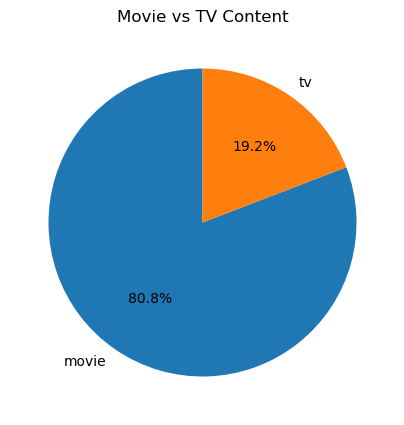

In [42]:
### 1. type (영화/TV 비율)
type_counts = df['type'].value_counts()
plt.figure(figsize=(5,5))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Movie vs TV Content')
plt.ylabel('')
plt.show()

## 개봉연도 분포

In [43]:
### 2. release_date (개봉 연도 분포)
# df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
# plt.figure(figsize=(10,5))
# sns.histplot(df['release_year'].dropna(), bins=20, kde=False)
# plt.title('Distribution of Release Year')
# plt.xlabel('Release Year')
# plt.ylabel('Count')
# plt.show()

## 상영시간 분포

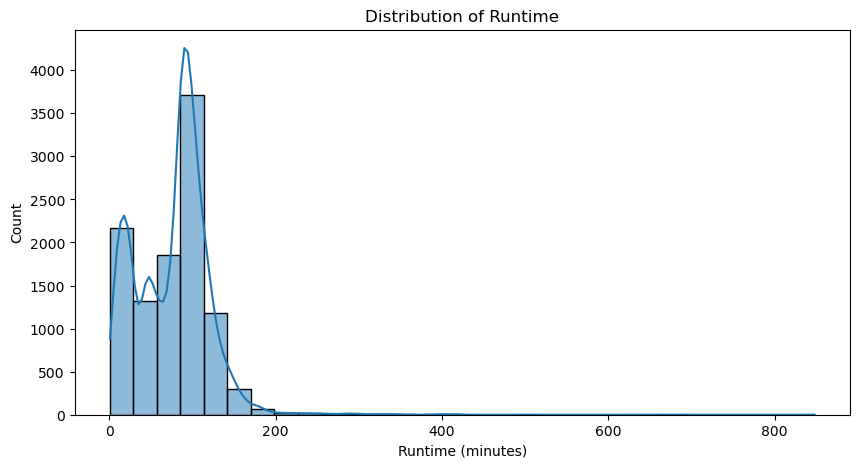

In [44]:
### 3. runtime (상영시간 분포)
plt.figure(figsize=(10,5))
sns.histplot(df['runtime'].dropna(), bins=30, kde=True)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

## 장르분포

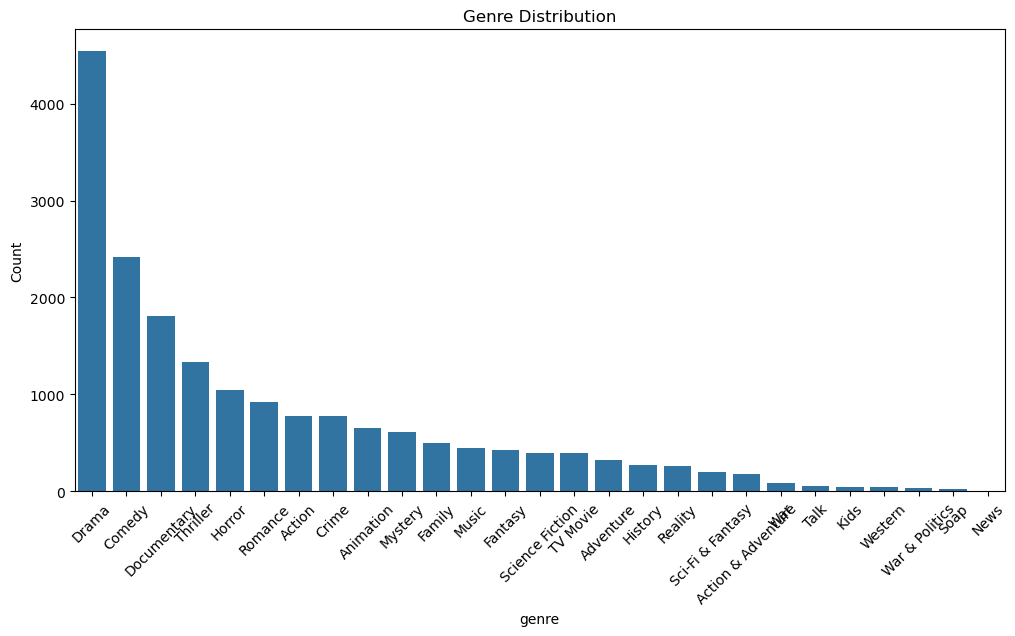

In [45]:
genre_series = df['genre'].dropna().str.split(', ')
genre_list = genre_series.explode()
genre_counts = genre_list.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## country 분포

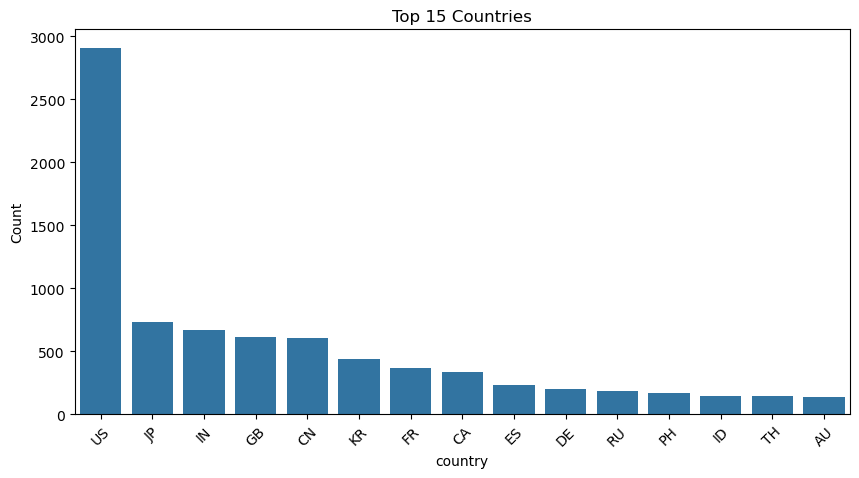

In [46]:
country_counts = df['country'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 15 Countries')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## language 분포

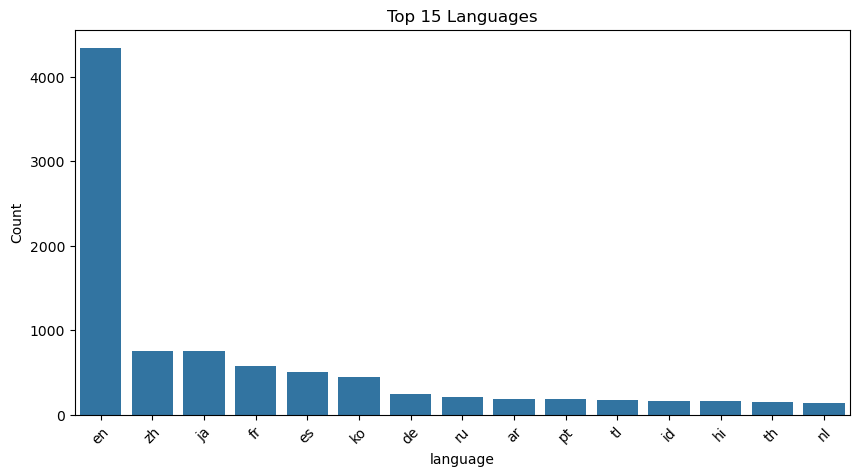

In [49]:
language_counts = df['language'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Top 15 Languages')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## imdb rating 분포

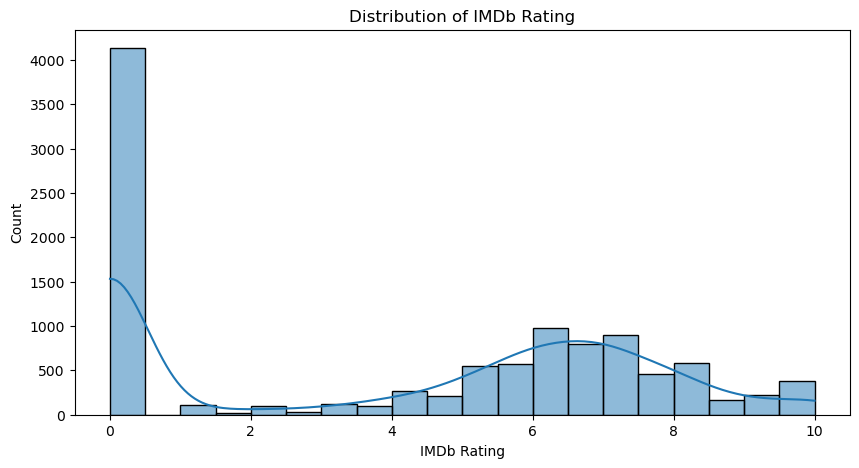

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(df['imdb_rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()

## imdb_rating vs imdb_review_count

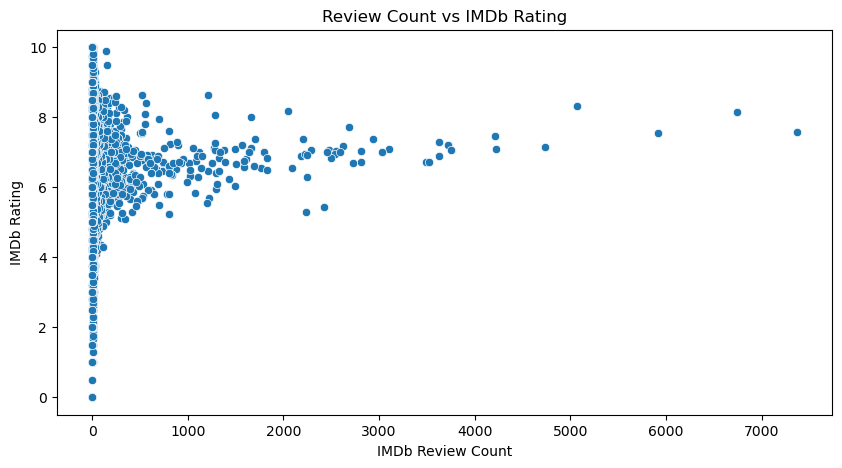

In [51]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='imdb_review_count', y='imdb_rating', data=df)
plt.title('Review Count vs IMDb Rating')
plt.xlabel('IMDb Review Count')
plt.ylabel('IMDb Rating')
plt.show()

## runtime vs imdb_rating

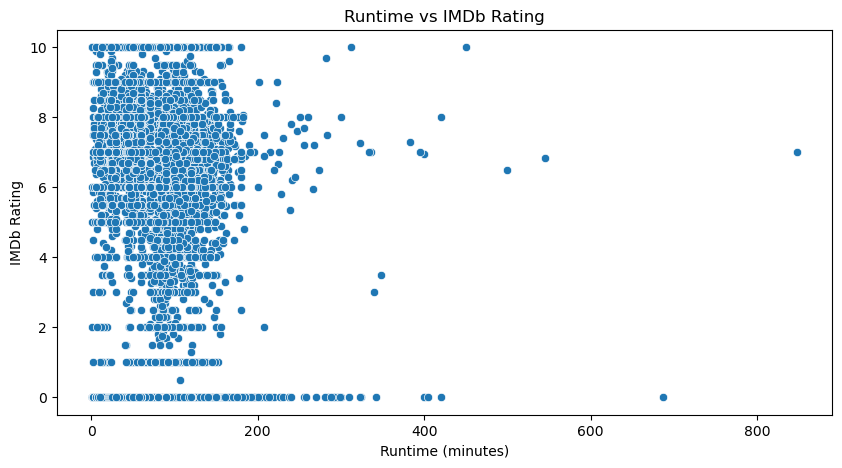

In [52]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='runtime', y='imdb_rating', data=df)
plt.title('Runtime vs IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

## 장르별 평점

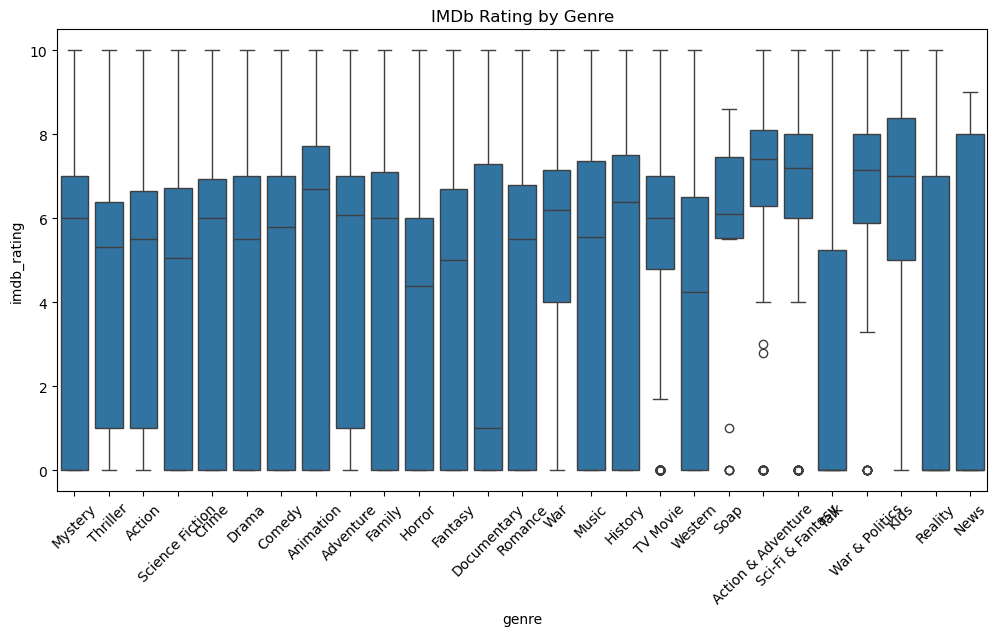

In [53]:
genre_rating = pd.concat([genre_series, df['imdb_rating']], axis=1).explode('genre')
genre_rating = genre_rating.dropna()
plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='imdb_rating', data=genre_rating)
plt.title('IMDb Rating by Genre')
plt.xticks(rotation=45)
plt.show()

## 나라별 장르 분포도

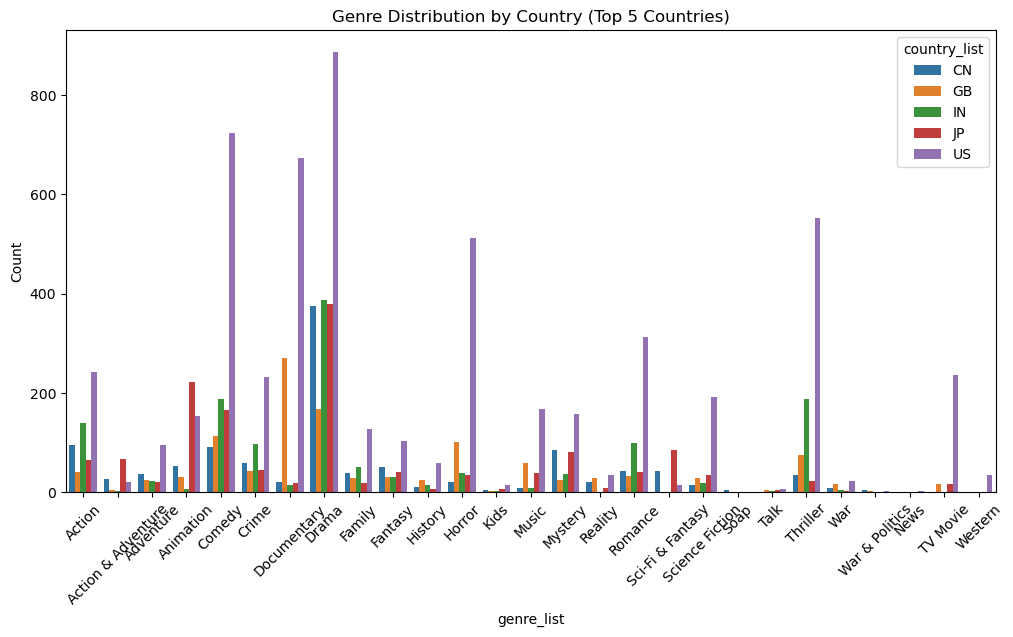

In [54]:
df_country_genre = df.copy()
df_country_genre['country_list'] = df_country_genre['country'].str.split(', ')
df_country_genre = df_country_genre.explode('country_list')
df_country_genre['genre_list'] = df_country_genre['genre'].str.split(', ')
df_country_genre = df_country_genre.explode('genre_list')

country_genre_counts = df_country_genre.groupby(['country_list', 'genre_list']).size().reset_index(name='count')
top_countries = df_country_genre['country_list'].value_counts().head(5).index
filtered = country_genre_counts[country_genre_counts['country_list'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(x='genre_list', y='count', hue='country_list', data=filtered)
plt.title('Genre Distribution by Country (Top 5 Countries)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## 평점 신뢰도 분석

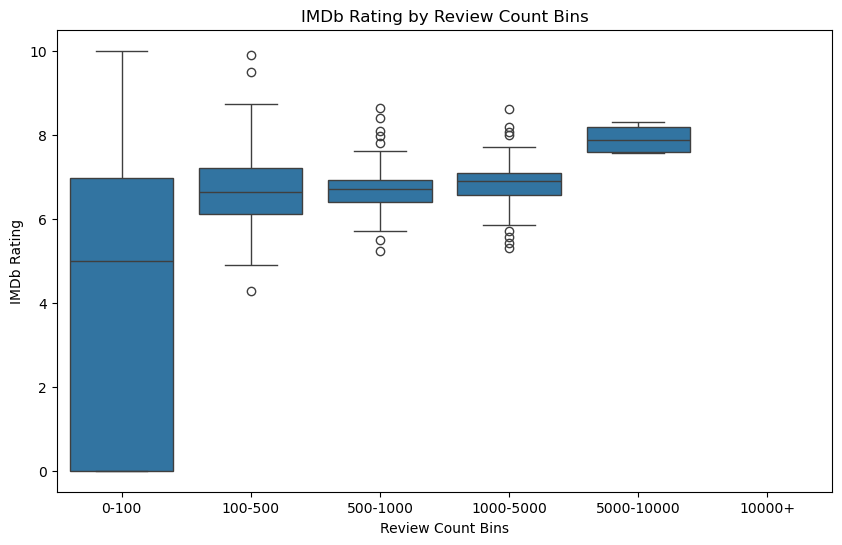

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_10073/2791718114.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='director', data=director_top, palette='viridis')


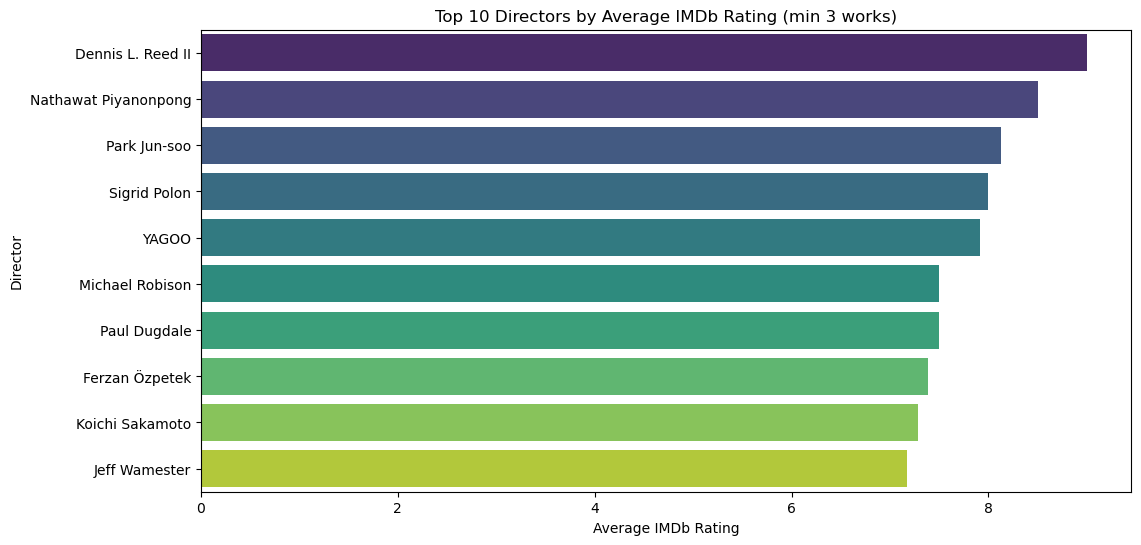

In [55]:
bins = [0, 100, 500, 1000, 5000, 10000, 50000]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['review_bin'] = pd.cut(df['imdb_review_count'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
sns.boxplot(x='review_bin', y='imdb_rating', data=df)
plt.title('IMDb Rating by Review Count Bins')
plt.xlabel('Review Count Bins')
plt.ylabel('IMDb Rating')
plt.show()

### 추가 심화 분석 ③ 감독별 평균 평점
# 감독 집계
director_avg = df.groupby('director')['imdb_rating'].agg(['count', 'mean']).reset_index()
director_top = director_avg[director_avg['count'] >= 3].sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='mean', y='director', data=director_top, palette='viridis')
plt.title('Top 10 Directors by Average IMDb Rating (min 3 works)')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.show()

## 배우별 평균 평점(작품 3개이상인 배우)

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_10073/3351837532.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='cast_list', data=cast_top, palette='plasma')


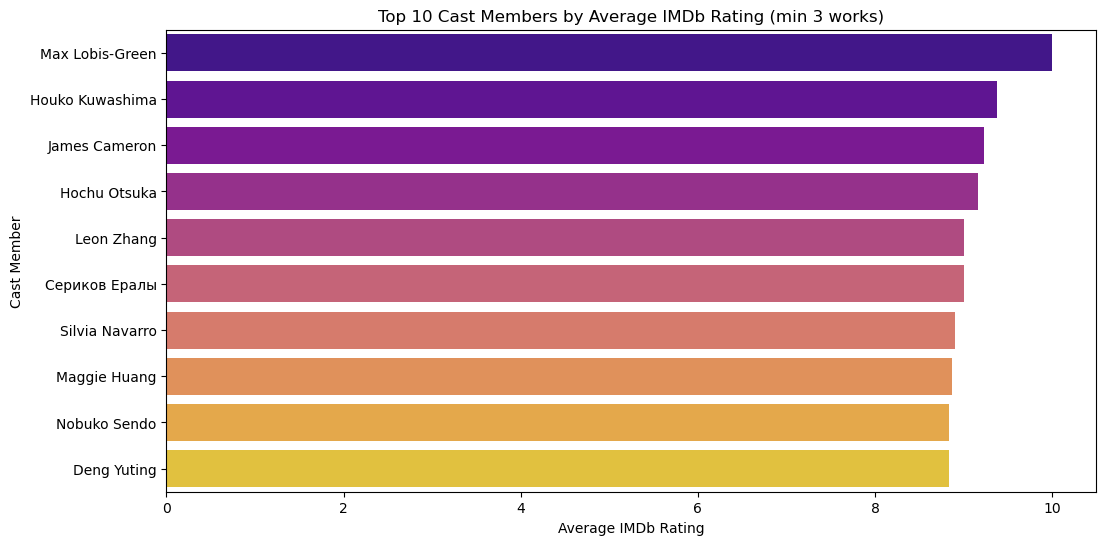

In [56]:
df['cast_list'] = df['cast'].str.split(', ')
df_cast = df.explode('cast_list')

cast_avg = df_cast.groupby('cast_list')['imdb_rating'].agg(['count', 'mean']).reset_index()
cast_top = cast_avg[cast_avg['count'] >= 3].sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='mean', y='cast_list', data=cast_top, palette='plasma')
plt.title('Top 10 Cast Members by Average IMDb Rating (min 3 works)')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Cast Member')
plt.show()

## 개봉 (월) 분석

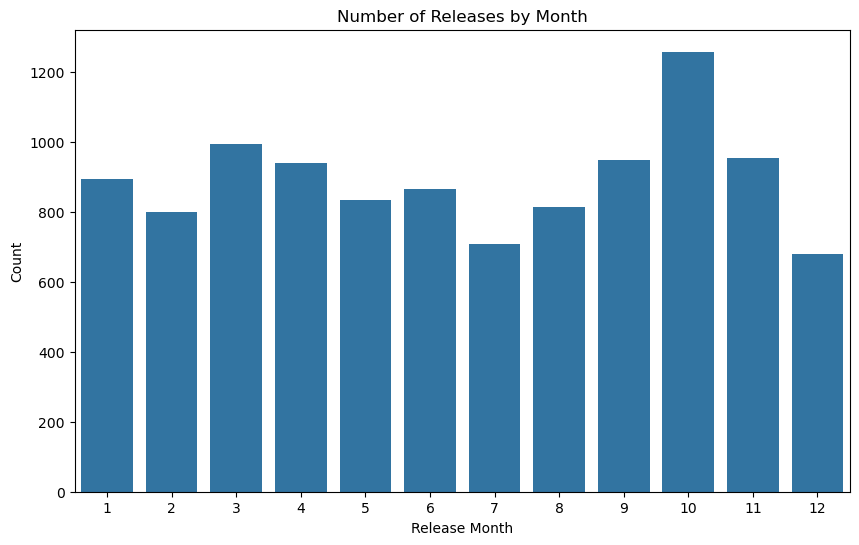

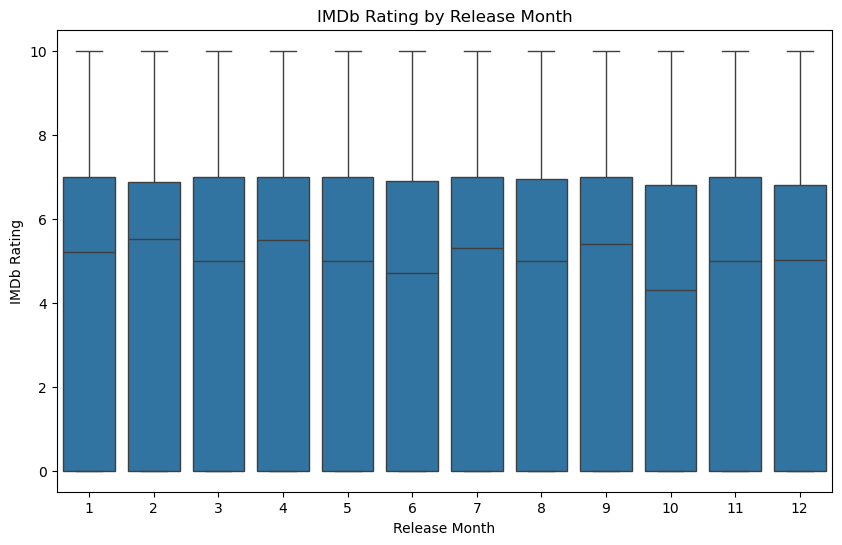

In [57]:
### 추가 심화 분석 ⑤ 개봉 월(month) 분석
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month

plt.figure(figsize=(10,6))
sns.countplot(x='release_month', data=df)
plt.title('Number of Releases by Month')
plt.xlabel('Release Month')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='release_month', y='imdb_rating', data=df)
plt.title('IMDb Rating by Release Month')
plt.xlabel('Release Month')
plt.ylabel('IMDb Rating')
plt.show()